# Uber and Lyft Analysis in Boston, MA 2018

Zaki Syaiful Hunafa 

RMT-018

# 1. Description

## Objective

Online taxi services have revolutionized the transportation industry by providing a convenient and reliable option for people to commute. With the increasing popularity of online taxi services, there has been a significant shift in the way people travel, with many choosing to opt for these services over traditional taxis. One of the primary reasons for this shift is the simplicity of the booking process. With just a few clicks on a mobile app, passengers can easily book a ride and track their driver in real-time.

Another reason why online taxi services have become so popular is the transparency of the pricing. Unlike traditional taxis, online taxi services offer upfront pricing, so passengers know exactly how much they will be paying before they even get into the cab. This helps eliminate any surprises or hidden costs that might arise during the trip.

To analyze the performance of online taxi services, the dataset from Kaggle will be used. This dataset contains information about Uber and Lyft trips in Boston, MA, including details about the type of service requested, the pickup and dropoff locations, the fare, and the duration of the trip. Using this dataset, the objective of the analysis is to make accurate predictions about the cab service that passengers are likely to choose, as well as the service of each cab.

To achieve this objective, machine learning techniques such as classification and regression analysis will be employed. The dataset will be divided into training and testing sets, with the training set used to train the model, and the testing set used to evaluate its accuracy. To ensure that the model is accurate, a threshold of `90% accuracy` is set.

Overall, the analysis of the dataset from Kaggle will provide valuable insights into the performance of online taxi services in Boston, MA, and the factors that influence passenger decisions when choosing a cab service. By accurately predicting the cab service that passengers are likely to choose, online taxi services can optimize their operations and provide a better experience for their customers.

# 2. Import Libraries

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

# To Encode Categorical Column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# To Scalling Numerical Column
from sklearn.preprocessing import MinMaxScaler

# For Regression Problems
from sklearn.linear_model import LinearRegression

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Save data
import pickle
import json

# 3. Data Loading


The dataset is taken from kaggle: https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

In [298]:
# Load the dataset
df_ori = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
df_ori.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [299]:
# Check if any duplicated data
df_ori[['id']].duplicated().sum()

0

`INSIGHT`:

There is no duplicated data. And since all id represent different order, hence we will drop it

In [300]:
# Fetch needed column only
df_ori = df_ori[['datetime', 'hour', 'day', 'month', 'short_summary', 'cab_type', 'name', 'distance', 'surge_multiplier', 'price']]
df = df_ori.copy()
df.head()

,datetime,hour,day,month,short_summary,cab_type,name,distance,surge_multiplier,price
0,2018-12-16 09:30:07,9,16,12,Mostly Cloudy,Lyft,Shared,0.44,1.0,5.0
1,2018-11-27 02:00:23,2,27,11,Rain,Lyft,Lux,0.44,1.0,11.0
2,2018-11-28 01:00:22,1,28,11,Clear,Lyft,Lyft,0.44,1.0,7.0
3,2018-11-30 04:53:02,4,30,11,Clear,Lyft,Lux Black XL,0.44,1.0,26.0
4,2018-11-29 03:49:20,3,29,11,Partly Cloudy,Lyft,Lyft XL,0.44,1.0,9.0


In [301]:
# Parse date from the datetime column
df['date'] = pd.to_datetime(df['datetime']).dt.date
df.head()

,datetime,hour,day,month,short_summary,cab_type,name,distance,surge_multiplier,price,date
0,2018-12-16 09:30:07,9,16,12,Mostly Cloudy,Lyft,Shared,0.44,1.0,5.0,2018-12-16
1,2018-11-27 02:00:23,2,27,11,Rain,Lyft,Lux,0.44,1.0,11.0,2018-11-27
2,2018-11-28 01:00:22,1,28,11,Clear,Lyft,Lyft,0.44,1.0,7.0,2018-11-28
3,2018-11-30 04:53:02,4,30,11,Clear,Lyft,Lux Black XL,0.44,1.0,26.0,2018-11-30
4,2018-11-29 03:49:20,3,29,11,Partly Cloudy,Lyft,Lyft XL,0.44,1.0,9.0,2018-11-29


In [302]:
# For a better understanding I rename short sumamry to weather 
df = df.rename(columns={'short_summary' : 'weather'})
df['weather'] = df['weather'].str.strip()
df['surge_multiplier'] = df['surge_multiplier'].replace(" ", "")

In [303]:
# Check the new dataset
df = df.drop(['datetime'], axis=1)
df.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,price,date
0,9,16,12,Mostly Cloudy,Lyft,Shared,0.44,1.0,5.0,2018-12-16
1,2,27,11,Rain,Lyft,Lux,0.44,1.0,11.0,2018-11-27
2,1,28,11,Clear,Lyft,Lyft,0.44,1.0,7.0,2018-11-28
3,4,30,11,Clear,Lyft,Lux Black XL,0.44,1.0,26.0,2018-11-30
4,3,29,11,Partly Cloudy,Lyft,Lyft XL,0.44,1.0,9.0,2018-11-29


Name | Definition
---|---
`hour` | Hour of the day, from it's using 24 hours format
`day` | Day of the month, from 1-31
`month` | Month of the year. We only use year of 2018
`weather` | Summary of weather at the time of order
`cab_type` | Type of taxi company, Uber or Lyft
`name` | Service type of each taxi company
`distance` | Distance of the ride in miles
`price` | Price of the order in USD
`date` | Date of the order
`surge_multiplier` | Multiplier used by taxi services when demand is higher than driver supply, from 1-3

`INSIGHT`:

The reason why I choose these columns are because from the `Uber official website` it explains how the company decide the fare for the taxi (https://www.uber.com/global/en/price-estimate/). Same with `Lyft` (https://help.lyft.com/hc/e/all/articles/115013080308-How-to-estimate-the-cost-of-a-Lyft-ride). In summary there are few of factors that determine the price of the trip, they are:
 * Base rate: both `Uber` and `Lyft` has its own base rate, which means even you take the shortest route possible you'll be charged by this minimum base rate. Each cities in the world might have different conditions in determining the base rate.
 * Busy times and area: different areas might be different in terms of density either they pick-up point or the drop-off point. Unfortunately this dataset don't  provide this particular data.
 * Ride type: as each of the taxi services has its own package, the exact same distance might generate different price due to different kind of service tha passanger took. The more premium of the ride type you take, the more expensive the base rate would be.
 * Demand: assuming taking taxi is one of many ways of people commuting. Hence for example, when the weather is raining people the demand of taxi order might get higher.

# 4. Exploratory Data Analysis (EDA)

There are some points I would like to explore on this dataset as follows:
 1. The portion of Lyft and Uber within the dataset 
 2. The distribuion of recorded weather within the dataset.
 3. The distribution of hour, day, and month in the dataset.
 4. The distribution of distance and price in each cab service.
 5. Inferential statistic.

### The distribution of hour, day, and month in the dataset

In [304]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

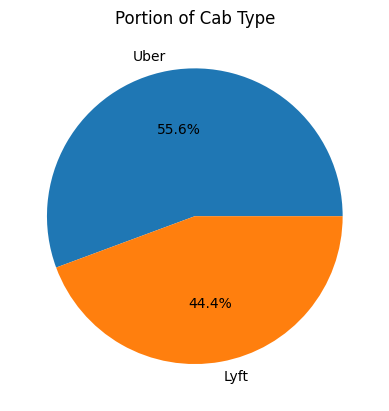

In [305]:
# Get the counts of each cab_type
cab_type_counts = df['cab_type'].value_counts()

# Create a pie chart
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%')
plt.title('Portion of Cab Type')
plt.show()

`INSIGHT`:

In Boston, MA, `Uber` is more popular than Lyft.

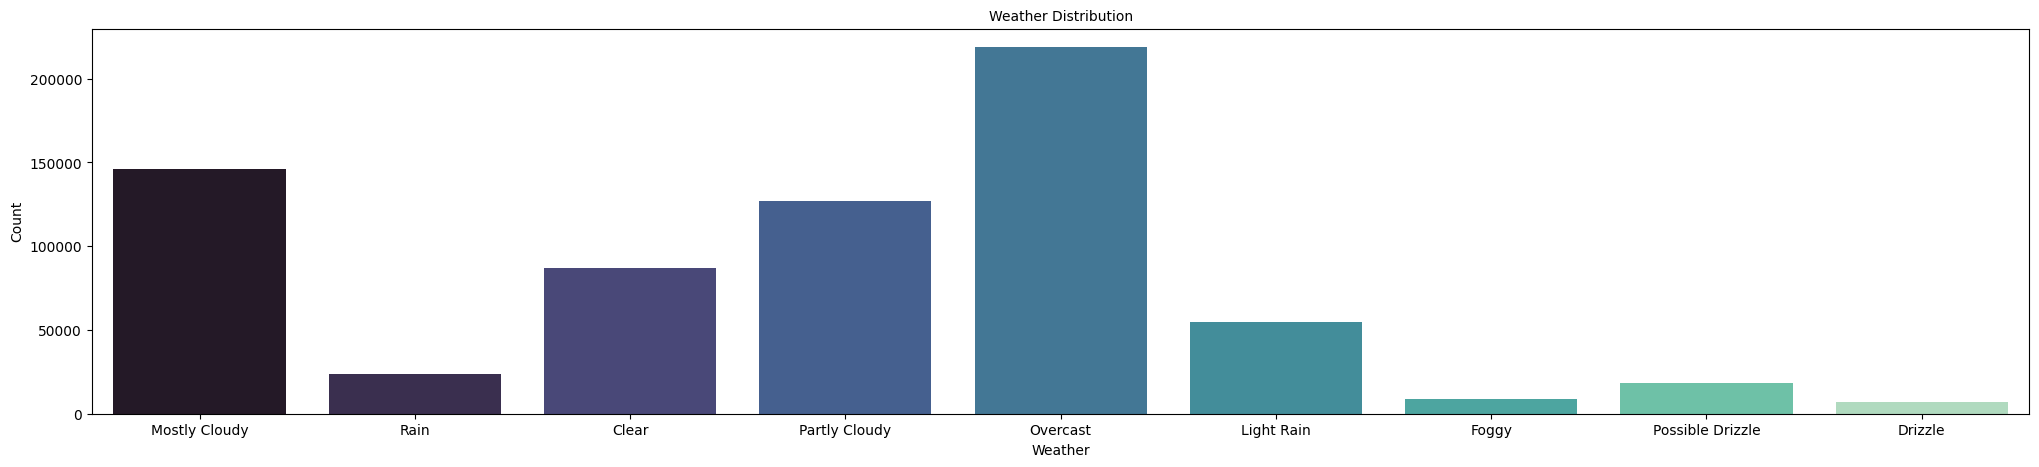

In [306]:
# See each of data in the feature weather in the dataset
plt.figure(figsize=(25,5))
sns.countplot(x = 'weather', data = df, palette = 'mako')
plt.xlabel('Weather')
plt.ylabel('Count', fontsize=10)
plt.title('Weather Distribution', fontsize=10)
plt.show()

`INSIGHT`:

For the weather that have been recorded in the dataset there are `9 different type of weather`. As the intensity of the weathers are dofferent from one to another, the prediction will be only limited to these data and these data only. 

 * Mostly cloudy: When the 6/8th to 7/8ths of the sky is covered by with opaque (not transparent) clouds.
 * Rain: Heavy rain.
 * Clear: When the 1/8th to 2/8ths of the sky is covered by with opaque (not transparent) clouds.
 * Partly Cloudy: Between 3/8 and 5/8 of the sky is covered by clouds.
 * Overcast: An official sky cover classification for aviation weather observations, when the sky is completely covered by an obscuring phenomenon. This is applied only when obscuring phenomenon aloft are present--that is, not when obscuring phenomenon are surface-based, such as fog.
 * Light Rain: light rain
 * Foggy: Condensed water vapor in cloudlike masses lying close to the ground and limiting visibility.
 * Possible Drizzle: possibility of small rain
 * Drizzle: small rain

 Source: https://www.weather.gov/


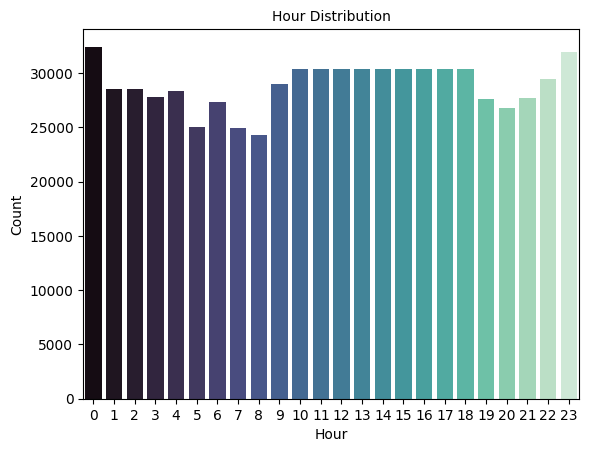

In [307]:
# See the distribution of hour toward the dataset
sns.countplot(x = 'hour', data = df, palette = 'mako')
plt.xlabel('Hour')
plt.ylabel('Count', fontsize=10)
plt.title('Hour Distribution', fontsize=10)
plt.show()

`INSIGHT`:

From the distribution of the hour we can see the order is almost evenly distributed `24 hours`

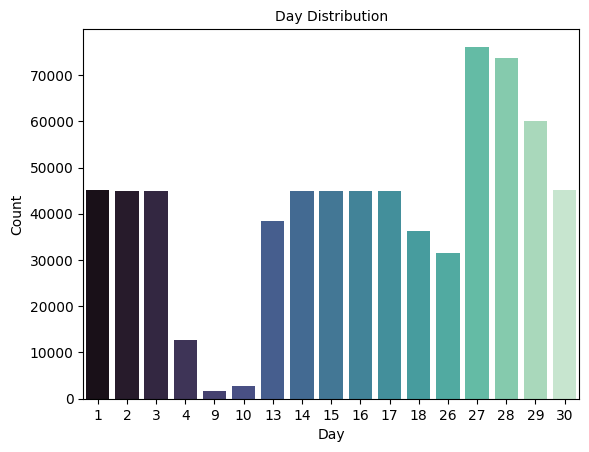

In [308]:
# See the distribution of day towards the dataset
sns.countplot(x = 'day', data = df, palette = 'mako')
plt.xlabel('Day')
plt.ylabel('Count', fontsize=10)
plt.title('Day Distribution', fontsize=10)
plt.show()

`INSIGHT`:

The order majorly took place in the end of the month

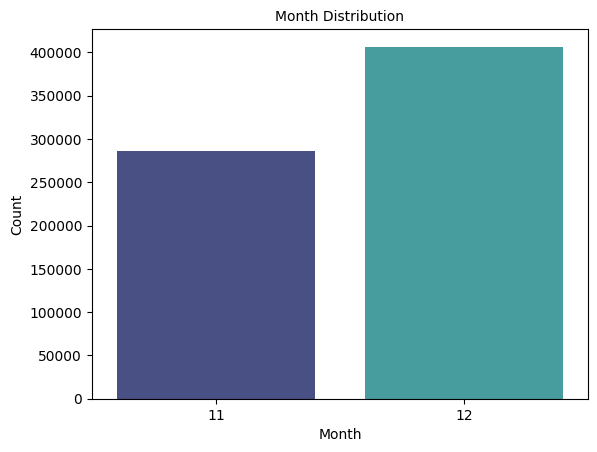

In [309]:
# See the distribution of month towards dataset
sns.countplot(x = 'month', data = df, palette = 'mako')
plt.xlabel('Month')
plt.ylabel('Count', fontsize=10)
plt.title('Month Distribution', fontsize=10)
plt.show()

`INSIGHT`:

From the data we know that the availability is only in `November` and `December`

### The distribution of distance and price in each cab service

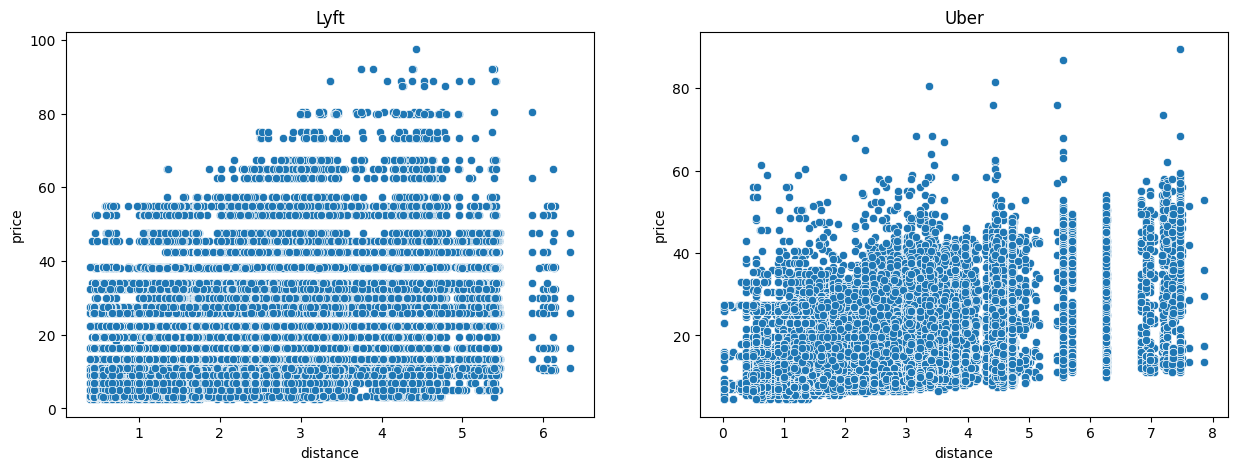

In [310]:
# Create df for each cab_type
# Lyft
df_lyft = df[(df['cab_type'] == 'Lyft')]

# Uber
df_uber = df[df['cab_type'] == 'Uber']


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='distance', y='price', data=df_lyft)
plt.title('Lyft')

plt.subplot(1,2,2)
sns.scatterplot(x='distance', y='price', data=df_uber)
plt.title('Uber')
plt.show()

`INSIGHT`:

At first we can see that the data `is not linear`. Because normally, `the higher the distance of an order, the higher price the customer should pay`. But since there are other factors such as the `type of service` the customer take in each service and the `weather` when the the order was set `might` determine to the high and down of the price.

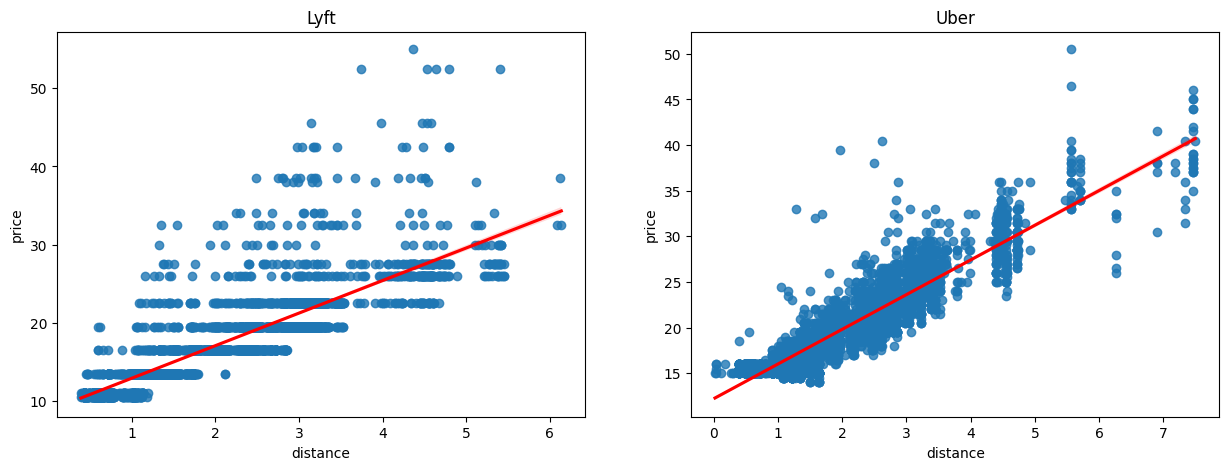

In [311]:
# Create df for each cab_type
# Lyft
df_lyft = df[(df['cab_type'] == 'Lyft') &
            (df['name'] == 'Lux') &
            (df['weather'] == 'Clear') &
            (df['hour'] < 12)]

# Uber
df_uber = df[(df['cab_type'] == 'Uber') &
            (df['name'] == 'Black') &
            (df['weather'] == 'Clear') &
            (df['hour'] < 12)]


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(x='distance', y='price', data=df_lyft, line_kws={"color": "red"})
plt.title('Lyft')

plt.subplot(1,2,2)
sns.regplot(x='distance', y='price', data=df_uber, line_kws={"color": "red"})
plt.title('Uber')
plt.show()

`INSIGHT`:

Here I'm trying to see the distribution between `price` and `distance` between `Uber` and `Lyft` by filtering the exact same condition to test if linear regression line take place. The filters are:

 * One of the service type of the taxi service. Here for `Uber` I took `Black`, and `Lux` for `Lyft`
 * I take all the orders happened in when the weather is `clear`
 * The orders happened in the morning which I filtered that the `hour` is before `12` as the hour is in the 24 hours

### Inferential statistic

In [312]:
df.describe()

,hour,day,month,distance,surge_multiplier,price
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000
mean,11.619137,17.794365,11.586684,2.189430,1.013870,16.545125
std,6.948114,9.982286,0.492429,1.138937,0.091641,9.324359
min,0.000000,1.000000,11.000000,0.020000,1.000000,2.500000
25%,6.000000,13.000000,11.000000,1.280000,1.000000,9.000000
50%,12.000000,17.000000,12.000000,2.160000,1.000000,13.500000
75%,18.000000,28.000000,12.000000,2.920000,1.000000,22.500000
max,23.000000,30.000000,12.000000,7.860000,3.000000,97.500000


In [313]:
df.describe(include='O')

,weather,cab_type,name,date
count,693071,693071,693071,693071
unique,9,2,13,17
top,Overcast,Uber,UberXL,2018-11-27
freq,218895,385663,55096,76121


`INSIGHT`:

On the average the distance for the order during november-december in Boston is `2.1 miles`. And the range of price found in the dataset is between `2.5 - 97.5 USD`. `UberXL` is the most popular uber services used by the user.

# 5.Feature Engineering

### Handling Missing Values

In [314]:
df.isnull().sum()

hour                    0
day                     0
month                   0
weather                 0
cab_type                0
name                    0
distance                0
surge_multiplier        0
price               55095
date                    0
dtype: int64

In [315]:
# Check Percentage of missing values
df.isnull().mean()

hour                0.000000
day                 0.000000
month               0.000000
weather             0.000000
cab_type            0.000000
name                0.000000
distance            0.000000
surge_multiplier    0.000000
price               0.079494
date                0.000000
dtype: float64

`INSIGHT`:

There are `55,095` missing values found in the feature `price` which made up about `7.9%` from the total data

In [316]:
# Check Missing Values for Variable `price`
df[df['price'].isnull()].head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,price,date
18,14,1,12,Partly Cloudy,Uber,Taxi,1.11,1.0,NaN,2018-12-01
31,23,2,12,Overcast,Uber,Taxi,2.48,1.0,NaN,2018-12-02
40,20,29,11,Partly Cloudy,Uber,Taxi,2.94,1.0,NaN,2018-11-29
60,20,13,12,Mostly Cloudy,Uber,Taxi,1.16,1.0,NaN,2018-12-13
69,13,30,11,Clear,Uber,Taxi,2.67,1.0,NaN,2018-11-30


In [317]:
# Create a variable that indicates whether the value of the variable `price` is missing or not
temp = df.copy()
temp['price_null'] = np.where(df['price'].isnull(),1,0)
temp.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,price,date,price_null
0,9,16,12,Mostly Cloudy,Lyft,Shared,0.44,1.0,5.0,2018-12-16,0
1,2,27,11,Rain,Lyft,Lux,0.44,1.0,11.0,2018-11-27,0
2,1,28,11,Clear,Lyft,Lyft,0.44,1.0,7.0,2018-11-28,0
3,4,30,11,Clear,Lyft,Lux Black XL,0.44,1.0,26.0,2018-11-30,0
4,3,29,11,Partly Cloudy,Lyft,Lyft XL,0.44,1.0,9.0,2018-11-29,0


In [318]:
# Group the data based on the `cab_type`
print('Value Counts')
print(temp.groupby('cab_type')['price_null'].value_counts())
print()
print('Mean')
print(temp.groupby('cab_type')['price_null'].mean())

Value Counts
cab_type  price_null
Lyft      0             307408
Uber      0             330568
          1              55095
Name: price_null, dtype: int64

Mean
cab_type
Lyft    0.000000
Uber    0.142858
Name: price_null, dtype: float64


`INSIGHT`:

The missing values only takes place in the `Uber` category. Since there is no feature indicating for cancelation or whatsoever hence the missing data needed to be handled

### Create Train-set and Test-set

In [319]:
X = df.drop(['price'], axis =1)
y = df[['price']]

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (554456, 9)
Test Size:  (138615, 9)


Skewness :  1.0457470560899256


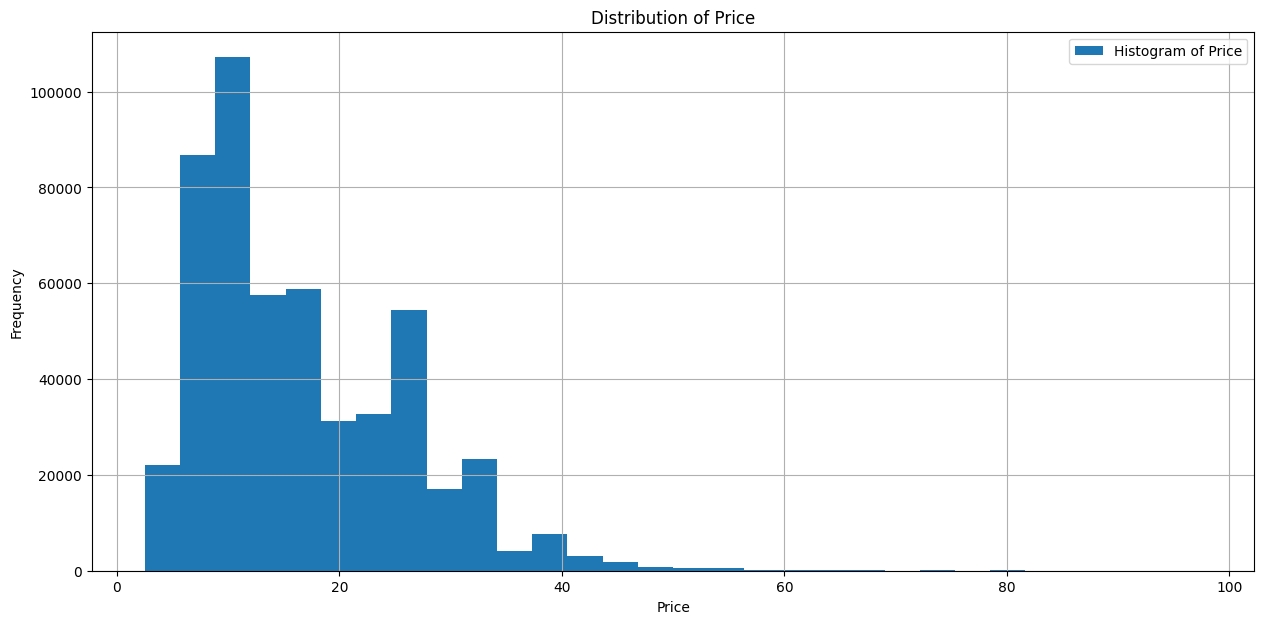

In [321]:
# Let's Check Type of Distirbution of feature `price`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

y_train['price'].hist(bins=30, ax=ax, label='Histogram of Price') # Histogram of original dataset
ax.set_title('Distribution of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', temp['price'].skew())

INSIGHT:

The data is skewed to the right, hence we use `Median` to fill the NA values in the column `price`

In [322]:
# Display Value of Median Before Imputation

mean_df = y_train['price'].mean()
median_df = y_train['price'].median()

print('Mean Value - Before Imputation   : ', mean_df)
print('Median Value - Before Imputation : ', median_df)

Mean Value - Before Imputation   :  16.542652539484145
Median Value - Before Imputation :  13.5


In [323]:
# Function to fill missing values with median in y_train
y_train['price'].fillna(median_df, inplace=True)
y_train.isnull().sum()

price    0
dtype: int64

In [324]:
# Function to fill missing values with median in y_test
y_test['price'].fillna(median_df, inplace=True)
y_test.isnull().sum()

price    0
dtype: int64

### See Outliers in Test-set

In [325]:
# Create function to create histplot and boxplot
def diagnostic(df, var):
    plt.figure(figsize=(16,4))

    # Hist
    plt.subplot(1,2,1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram ' + var)

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var])
    plt.title('Boxplot ' + var)

    plt.show

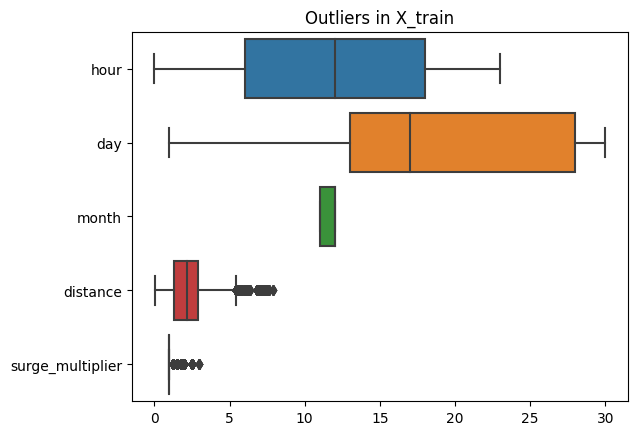

In [326]:
# Outliers in X_train
sns.boxplot(data=X_train, orient='h')
plt.title('Outliers in X_train')
plt.show()


Skewness Value :  1.1495493393371072


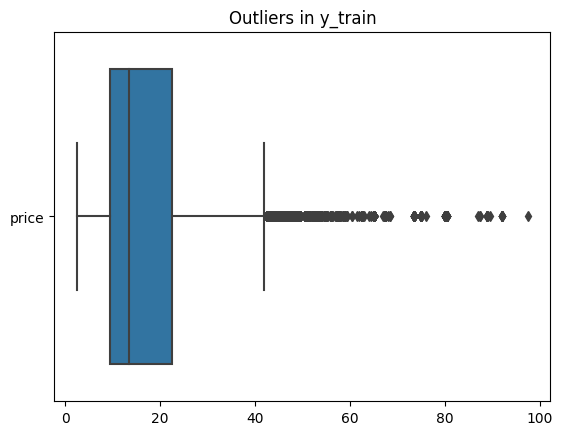

In [327]:
# Outliers in y_train
sns.boxplot(data=y_train, orient='h')
plt.title('Outliers in y_train')
print('\nSkewness Value : ', y_train['price'].skew())
plt.show()

`INSIGHT`:

As we can see, the price is `skewed with a tail to the right` from the histogram. From the `boxplot` we can see there are some outliers at the right end of the distribution variable.

### Outlier Handling

Since the distribution is not well-distributed we'll be using `Tukey Rule: IQR`

In [328]:
# Create function to find IQR, upper and lower boundaries for skewed distribution

def find_skew (data, var, distance):
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)

    iqr = q3-q1
    lower_boundaries = q1 - 1.5 * iqr
    upper_boundaries = q3 + 1.5 * iqr

    return upper_boundaries, lower_boundaries

In [329]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `price` in the dataset
price_upper_boundaries, price_lower_boundaries = find_skew(y_train, 'price', 1.5)
print('Upper and lower boundaries in price for 1.5 times inter-quantile')
print(price_upper_boundaries, price_lower_boundaries)
print('')

# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `distance` in the dataset
distance_upper_boundaries, distance_lower_boundaries = find_skew(X_train, 'distance', 1.5)
print('Upper and lower boundaries in distance for 1.5 times inter-quantile')
print(distance_upper_boundaries, distance_lower_boundaries)
print('')

Upper and lower boundaries in price for 1.5 times inter-quantile
42.0 -10.0

Upper and lower boundaries in distance for 1.5 times inter-quantile
5.405 -1.195



In [330]:
# Look for number and percentage of order of outliers for 'price' ArithmeticError
print('Total order: {}'.format(len(y_train)))
print('Taxi orders with price bigger than 42 USD: {}'.format(len(y_train[y_train['price'] > price_upper_boundaries])))
print('% of taxi orders with price bigger than 42 USD: {}'.format(len(y_train[y_train['price'] > price_upper_boundaries])/len(df) * 100))
print('-'*42)

# Look for number and percentage of order of outliers for 'distance' ArithmeticError
print('Total order: {}'.format(len(X_train)))
print('Taxi orders with distance bigger than 5 km: {}'.format(len(X_train[X_train['distance'] > distance_upper_boundaries])))
print('% of taxi orders with distance bigger than 5 km: {}'.format(len(X_train[X_train['distance'] > distance_upper_boundaries])/len(df) * 100))

Total order: 554456
Taxi orders with price bigger than 42 USD: 6369
% of taxi orders with price bigger than 42 USD: 0.9189534694136676
------------------------------------------
Total order: 554456
Taxi orders with distance bigger than 5 km: 6626
% of taxi orders with distance bigger than 5 km: 0.9560348074006847


In [331]:
# Set Upper and Lower Limit for each variable
# Price
price_upper_limit, price_lower_limit = find_skew(y_train, 'price', 1.5)

# Distance
distance_upper_limit, distance_lower_limit = find_skew(X_train, 'distance', 1.5)

### Trimming

In [332]:
# Define Outliers
# Outliers for Price
outliers_price = np.where(y_train['price'] > price_upper_limit, True,
                          np.where(y_train['price'] < price_lower_limit, True, False))

# Outliers for Price
outliers_distance = np.where(X_train['distance'] > distance_upper_limit, True,
                          np.where(X_train['distance'] < distance_lower_limit, True, False))

# Let's trimm the dataset
y_train_trimmed = y_train.loc[~(outliers_price + outliers_distance)]
X_train_trimmed = X_train.loc[~(outliers_price + outliers_distance)]
print('y_train dataset - Before trimming : ', y_train.shape)
print('y_train dataset - After trimming  : ', y_train_trimmed.shape)
print('-'*42)
print('X_train dataset - Before trimming : ', X_train.shape)
print('X_train dataset - After trimming  : ', X_train_trimmed.shape)

y_train dataset - Before trimming :  (554456, 1)
y_train dataset - After trimming  :  (542366, 1)
------------------------------------------
X_train dataset - Before trimming :  (554456, 9)
X_train dataset - After trimming  :  (542366, 9)


### See Outliers in Trimmed Test-set

Train-Set After Trimming


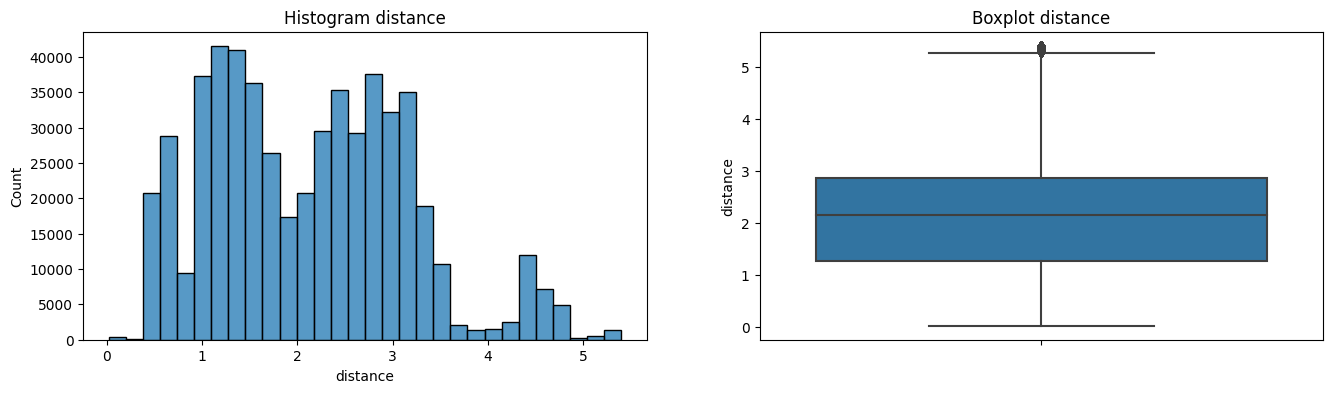

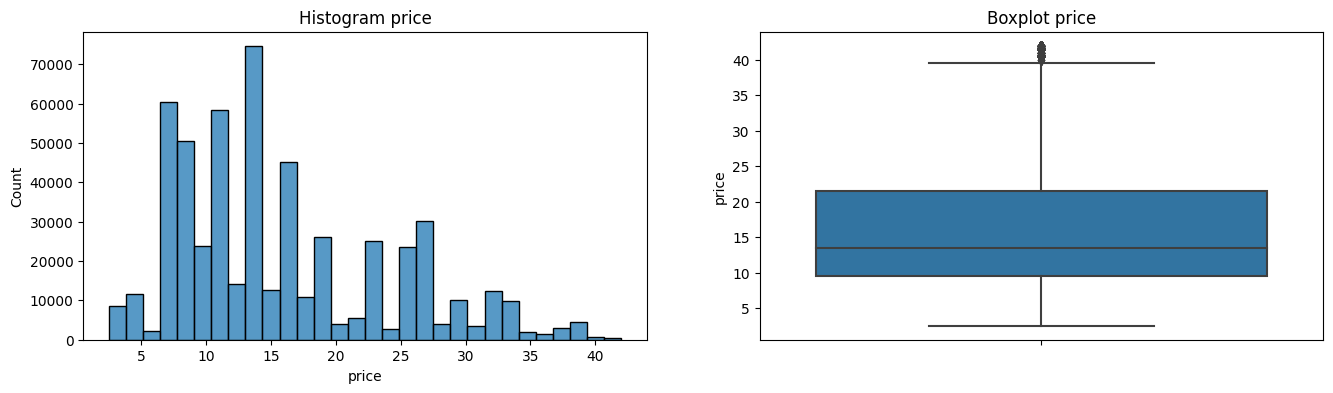

In [333]:
# See the distribuyion of distance and price after trimmed
print('Train-Set After Trimming')
diagnostic(X_train_trimmed, 'distance')
diagnostic(y_train_trimmed, 'price')

Now the we can see the distribution is fairly normal, as well as the outliers is not as extreme as it was.

### Create Cardinality

Handling high cardinality in some data for a better model. As some of the data are still be able to be grouped into a certain box has it's has the same traits. It's also to determine the relevance and usefulness of a feature. As features with high cardinality may have a lot of unique values, which could make it more difficult to train models or identify patterns. In the last it's hoped to enhance the performance Optimization, because cardinality can affect the performance of database queries, indexing, and storage. High cardinality columns may require more memory and processing power to manage, while low cardinality columns may be easier to index and search.

There are some features that I will group so it has lower cardinality, there are:

 * In the feature `hour`, I will group it into AM and PM
 * Grouping `distance` into:
     - Near
     - Medium
     - Far
     - Very Far
 * Create a new feature contains if an order is done on the weekend or not

Source: https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

In [334]:
X_train_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542366 entries, 424231 to 128037
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              542366 non-null  int64  
 1   day               542366 non-null  int64  
 2   month             542366 non-null  int64  
 3   weather           542366 non-null  object 
 4   cab_type          542366 non-null  object 
 5   name              542366 non-null  object 
 6   distance          542366 non-null  float64
 7   surge_multiplier  542366 non-null  float64
 8   date              542366 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 41.4+ MB


In [335]:
# Grouping X_train hour into AM and PM
X_train_trimmed['time'] = 'am'
X_train_trimmed.loc[X_train_trimmed['hour'] > 12, 'time'] = 'pm'
X_train_trimmed.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,date,time
424231,11,18,12,Mostly Cloudy,Uber,Black SUV,1.68,1.0,2018-12-18,am
462379,10,17,12,Possible Drizzle,Lyft,Lux,2.03,1.0,2018-12-17,am
517429,17,26,11,Overcast,Lyft,Lyft,1.02,1.0,2018-11-26,pm
23107,2,29,11,Mostly Cloudy,Uber,UberXL,0.49,1.0,2018-11-29,am
354648,4,30,11,Clear,Uber,Taxi,2.80,1.0,2018-11-30,am


In [336]:
# Grouping X_test hour into AM and PM
X_test['time'] = 'am'
X_test.loc[X_test['hour'] > 12, 'time'] = 'pm'
X_test.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,date,time
541064,9,2,12,Light Rain,Lyft,Lux,1.50,1.0,2018-12-02,am
215250,17,28,11,Overcast,Lyft,Lyft XL,2.41,1.0,2018-11-28,pm
454530,13,28,11,Partly Cloudy,Lyft,Lyft,1.07,1.0,2018-11-28,pm
150598,8,13,12,Clear,Uber,UberPool,3.53,1.0,2018-12-13,am
592364,11,28,11,Mostly Cloudy,Lyft,Lux Black,2.29,1.0,2018-11-28,am


In [337]:
# Grouping distance on X_train_trimmed
# count bins
hist, bins = np.histogram(X_train_trimmed['distance'], bins=4)

# print bins
for i in range(len(bins)-1):
    print("Bin {}: {} - {} = {}".format(i, bins[i], bins[i+1], hist[i]))

Bin 0: 0.02 - 1.3650000000000002 = 159748
Bin 1: 1.3650000000000002 - 2.7100000000000004 = 214514
Bin 2: 2.7100000000000004 - 4.055 = 138458
Bin 3: 4.055 - 5.4 = 29646


In [338]:
# Plot Bins On X_train_trimmed
bins = -np.inf, 2,4,6, np.inf

# Bins Label
labels = ['near', 'medium', 'far', 'very far']

# Bin the variable using set parameters
X_train_trimmed['distance_level'] = pd.cut(df['distance'],
                              bins=bins,
                              labels=labels)

X_train_trimmed['distance_level'] = X_train_trimmed['distance_level'].astype('str')

In [339]:
# Plot Bins On X_test
bins = -np.inf, 2,4,6, np.inf

# Bins Label
labels = ['near', 'medium', 'far', 'very far']

# Bin the variable using set parameters
X_test['distance_level'] = pd.cut(df['distance'],
                              bins=bins,
                              labels=labels)

X_test['distance_level'] = X_test['distance_level'].astype('str')

In [340]:
# Create a new column in the dataframe to indicate if the datetime is a weekend or not
X_train_trimmed['is_weekend'] = X_train_trimmed['date'].apply(lambda x: 1 if x.weekday() in [5,6] else 0)
X_train_trimmed.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,date,time,distance_level,is_weekend
424231,11,18,12,Mostly Cloudy,Uber,Black SUV,1.68,1.0,2018-12-18,am,near,0
462379,10,17,12,Possible Drizzle,Lyft,Lux,2.03,1.0,2018-12-17,am,medium,0
517429,17,26,11,Overcast,Lyft,Lyft,1.02,1.0,2018-11-26,pm,near,0
23107,2,29,11,Mostly Cloudy,Uber,UberXL,0.49,1.0,2018-11-29,am,near,0
354648,4,30,11,Clear,Uber,Taxi,2.80,1.0,2018-11-30,am,medium,0


In [341]:
# Create a new column in the dataframe to indicate if the datetime is a weekend or not
X_test['is_weekend'] = X_test['date'].apply(lambda x: 1 if x.weekday() in [5,6] else 0)
X_test.head()

,hour,day,month,weather,cab_type,name,distance,surge_multiplier,date,time,distance_level,is_weekend
541064,9,2,12,Light Rain,Lyft,Lux,1.50,1.0,2018-12-02,am,near,1
215250,17,28,11,Overcast,Lyft,Lyft XL,2.41,1.0,2018-11-28,pm,medium,0
454530,13,28,11,Partly Cloudy,Lyft,Lyft,1.07,1.0,2018-11-28,pm,near,0
150598,8,13,12,Clear,Uber,UberPool,3.53,1.0,2018-12-13,am,medium,0
592364,11,28,11,Mostly Cloudy,Lyft,Lux Black,2.29,1.0,2018-11-28,am,medium,0


In [342]:
# Drop unused column in X_train_trimmed
X_train_trimmed = X_train_trimmed.drop(['month', 'hour', 'day', 'date'], axis=1)
X_train_trimmed.head()

,weather,cab_type,name,distance,surge_multiplier,time,distance_level,is_weekend
424231,Mostly Cloudy,Uber,Black SUV,1.68,1.0,am,near,0
462379,Possible Drizzle,Lyft,Lux,2.03,1.0,am,medium,0
517429,Overcast,Lyft,Lyft,1.02,1.0,pm,near,0
23107,Mostly Cloudy,Uber,UberXL,0.49,1.0,am,near,0
354648,Clear,Uber,Taxi,2.80,1.0,am,medium,0


In [343]:
# Drop unused column in X_test
X_test = X_test.drop(['month', 'hour', 'day', 'date'], axis=1)
X_test.head()

,weather,cab_type,name,distance,surge_multiplier,time,distance_level,is_weekend
541064,Light Rain,Lyft,Lux,1.50,1.0,am,near,1
215250,Overcast,Lyft,Lyft XL,2.41,1.0,pm,medium,0
454530,Partly Cloudy,Lyft,Lyft,1.07,1.0,pm,near,0
150598,Clear,Uber,UberPool,3.53,1.0,am,medium,0
592364,Mostly Cloudy,Lyft,Lux Black,2.29,1.0,am,medium,0


In [344]:
# See the info of Test-set
print(X_train_trimmed.info())
print('-'*42)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542366 entries, 424231 to 128037
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   weather           542366 non-null  object 
 1   cab_type          542366 non-null  object 
 2   name              542366 non-null  object 
 3   distance          542366 non-null  float64
 4   surge_multiplier  542366 non-null  float64
 5   time              542366 non-null  object 
 6   distance_level    542366 non-null  object 
 7   is_weekend        542366 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB
None
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 138615 entries, 541064 to 120144
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   weather           138615 non-null  object 
 1   cab_type          138615 non-n

### Split Num and Cat Columns

In [345]:
# Get numerical and categorical column 
num_col = ['distance', 'surge_multiplier']

# For categorical we'll separate based on numerical and 
cat_col = ['cab_type', 'name']
cat_col_ord = ['weather', 'time', 'distance_level', 'is_weekend']

In [346]:
# Define Train-set and Test-set
# X-set for Numerical Column
X_train_num = X_train_trimmed[num_col]
X_test_num = X_test[num_col]

# X-set for Categorical Column
X_train_cat = X_train_trimmed[cat_col]
X_test_cat = X_test[cat_col]

# X-set for Categorical Ordinal Column
X_train_cat_ord = X_train_trimmed[cat_col_ord]
X_test_cat_ord = X_test[cat_col_ord]

### Encoding Category Ordinal

In [347]:
# Feature encoding using OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Mostly Cloudy', 'Rain', 'Clear', 'Partly Cloudy', 'Overcast',
       'Light Rain', 'Foggy', 'Possible Drizzle', 'Drizzle'], # Defined 'weather'
       ['am', 'pm'], # Defined 'time'
       ['near', 'medium', 'far', 'very far'], # Defined distance level
       [0,1], # Defined 'is_weekend'
       ])

encoder.fit(X_train_cat_ord)
X_train_catold_encoded = encoder.transform(X_train_cat_ord)
X_test_catold_encoded = encoder.transform(X_test_cat_ord)

### Encoding Category 

In [364]:
# Feature encoding using OneHotEncoder
column = ['cab_type', 'name']
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train_cat)

OneHotEncoder(sparse=False, sparse_output=False)

In [365]:
# Assign to Train-set and Test-set
X_train_cat_encoded = ohe.transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [366]:
X_train_cat_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [367]:
# Create variable to store categorical column's name
x = X_train['name'].unique()
y = X_train['cab_type'].unique()
feature_labels = np.concatenate((x,y))
cat_labels = list(feature_labels)
cat_labels

['Black SUV',
 'Lux',
 'Lyft',
 'UberXL',
 'Taxi',
 'WAV',
 'UberX',
 'UberPool',
 'Black',
 'Lux Black XL',
 'Lux Black',
 'Lyft XL',
 'Shared',
 'Uber',
 'Lyft']

### Scalled Numerical Column

In [368]:
# Define Test-set and Train-set for Numerical Column
X_train_num = X_train_trimmed[num_col]
X_test_num = X_test[num_col]

In [369]:
# Feature Scalling using MniMaxScaller

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Joined All Encoded and Scalling 

In [370]:
# Join array for scaled and encoded features
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train_catold_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test_catold_encoded], axis=1)

# Create dataframe for all joined array
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_col + cat_labels + cat_col_ord])
X_train_final_df.head()


,distance,surge_multiplier,Black SUV,Lux,Lyft,UberXL,Taxi,WAV,UberX,UberPool,Black,Lux Black XL,Lux Black,Lyft XL,Shared,Uber,Lyft,weather,time,distance_level,is_weekend
0,0.308550,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.373606,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0
2,0.185874,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
3,0.087361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.516729,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


# 6. Model Definition

Linear regression is a commonly used statistical technique for predicting numerical values, such as prices. Here are some advantages and disadvantages of using linear regression for price prediction:

Advantages:

 - Simplicity: Linear regression is a simple and easy-to-understand method that requires minimal assumptions and can be easily implemented.
 - Interpretability: Linear regression provides a clear relationship between the dependent variable (price) and the independent variables (predictors), making it easy to interpret the results and draw conclusions.
 - Versatility: Linear regression can be used to predict a wide range of numerical values, making it a versatile tool for various industries and applications.


Disadvantages:

 - Linearity assumption: Linear regression assumes a linear relationship between the dependent variable and the independent variables, which may not be the case in reality.
 - Overfitting: Linear regression can be prone to overfitting if the model is too complex or there are too many predictors relative to the number of observations in the data.
 - Outliers: Linear regression is sensitive to outliers, which can affect the accuracy and reliability of the predictions.

In [371]:
# Define model
model_lin_reg = LinearRegression()

# 7. Model Training

In [372]:
# Fit Train-set
model_lin_reg.fit(X_train_final, y_train_trimmed)

LinearRegression()

# 8. Model Evaluation

In [373]:
# Predict Train-set and Test-set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([[28.72560883],
       [16.87599182],
       [ 6.20276642],
       ...,
       [ 7.62471008],
       [10.88349152],
       [ 7.95122528]])

In [374]:
# Display y_train
y_train.head()

,price
424231,30.5
462379,16.5
517429,7.0
23107,10.5
354648,13.5


In [375]:
# Model Evaluation using MAE, MAPE and R2 Score

print('Error - Train Set: ', round(mean_absolute_error(y_train_trimmed, y_pred_train),2))
print('Error - Test Set: ', round(mean_absolute_error(y_test, y_pred_test),2))
print('')
print('Percentage Error - Train Set: ', round(mean_absolute_percentage_error(y_train_trimmed, y_pred_train)*100,2),'%')
print('Percentage Error - Test Set: ', round(mean_absolute_percentage_error(y_test, y_pred_test)*100,2),'%')
print(' ')
print('R2 score - Test Set', round(r2_score(y_train_trimmed, y_pred_train)*100,2),'%')
print('R2 score - Train Set: ', round(r2_score(y_test, y_pred_test)*100,2),'%')


Error - Train Set:  1.67
Error - Test Set:  1.82

Percentage Error - Train Set:  12.71 %
Percentage Error - Test Set:  13.02 %
 
R2 score - Test Set 92.81 %
R2 score - Train Set:  91.29 %


`INSIGHT`:

In the context of the Uber and Lyft analysis in Boston in 2018, an `MAE` of `1.67` means that on average, since the mean absolute error shows `1.67` and `1.82` the predictions made by the model differ from the actual values by said units. For example, if the model predicts a fare of `$20` for a ride, the actual fare could be anywhere between `$18.33` and `$21.67`, given the MAE of `1.67` with the percentage average of these percentage errors across all the observations is `12.71` and `13.02` for train and test set respectfully. As the `MAE` between the train and test set is not that far we can conclude that the model is `goodfit`, moreover the accuracy that we have set in the beginning is exceed up to `2.81` and `1.29` for train and test set respectfully.

To improve the accuracy of the regression model, here are some features you may consider adding:

 1. `Density/peak hour of demand vs. driver availability`: As mentioned earlier, this information could be used to optimize driver allocation and improve service availability during peak demand hours.

 2. `Traffic conditions`: The addition of traffic data could help to more accurately predict the duration of trips and therefore the fares.

 3. `Promotions`: Adding a feature to capture promotions or discounts could help to predict the fare and duration for customers who use these promotions.

Overall, adding more features to the regression model could help to improve the accuracy of the predictions and provide more valuable insights into the factors that affect Uber and Lyft fares and durations in Boston.


# 9. Model Saving

In [360]:
with open('model_lin_reg.pkl', 'wb') as file_1:
    pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

with open('model_encoder_ord.pkl', 'wb') as file_3:
    pickle.dump(encoder, file_3)

with open("model_encoder.pkl", "wb") as file_4: 
    pickle.dump(ohe, file_4)

with open('list_num_cols.txt', 'w') as file_5:
    json.dump(num_col, file_5)

with open('list_cat_cols.txt', 'w') as file_6:
    json.dump(cat_col, file_6)

with open('list_cat_cols_ord.txt', 'w') as file_7:
    json.dump(cat_col_ord, file_7)

# 10. Conclusion

In [361]:
# Get intercept and Slope
print('Intercept: ', model_lin_reg.intercept_)
print('Slope: ', model_lin_reg.coef_)

Intercept:  [5.74005978e+10]
Slope:  [[ 1.31729390e+01  2.62258056e+01 -2.02423999e+10 -1.41273720e+11
   8.38731219e+10  8.38731219e+10 -3.71581979e+10 -3.71581979e+10
  -3.71581979e+10 -3.71581980e+10 -3.71581979e+10 -3.71581980e+10
   8.38731219e+10  8.38731219e+10  8.38731219e+10  8.38731219e+10
   8.38731219e+10 -3.78242949e-04 -2.99512133e-03  9.96845573e-02
   3.28879373e-03]]


In [362]:
# List All Columns
X_train_final_df.columns

MultiIndex([(        'distance',),
            ('surge_multiplier',),
            (       'Black SUV',),
            (             'Lux',),
            (            'Lyft',),
            (          'UberXL',),
            (            'Taxi',),
            (             'WAV',),
            (           'UberX',),
            (        'UberPool',),
            (           'Black',),
            (    'Lux Black XL',),
            (       'Lux Black',),
            (         'Lyft XL',),
            (          'Shared',),
            (            'Uber',),
            (            'Lyft',),
            (         'weather',),
            (            'time',),
            (  'distance_level',),
            (      'is_weekend',)],
           )

`Conclusion`:

In conclusion, the analysis of Uber and Lyft data in Boston in 2018 shows that online taxi services are a popular and convenient option for commuters. Order mostly took place when the weather is `overcast` or `cloudy` compare when it's `clear` or even `rain`. The regression model used in this analysis had a high R2 score of `92.81%` on the test set and `91.29%` on the train set, indicating that the model accurately predicts the fare, duration, or other dependent variables based on the independent variables. The error rate for both the train set and test set was relatively low at `1.67` and `1.82`, respectively, and the percentage error was around `13%`.

The intercept in this model was `5.74`, which represents the predicted value of the dependent variable when all independent variables are equal to zero. As for the regression cooficient or slope, we can see distance level generates higher value compare to other features, it means that the fare would linearly will increase if the distance level also increase. It also applies if the user take a more premium taxi services in each of Lyft or Uber such as `Lyft, UberXL Lux Black XL, Lux Black, Lyft XL`. In summary, the regression model provides valuable insights into the factors that affect Uber and Lyft services fares and durations in Boston, and these findings can be used to optimize and improve the services provided by these companies.

From the dataset we can't found the `density/peak hour of the demand` vs the `availability of the driver`. It created the prediction is bias towards the `type of services` the user taken and `the weather` as the comparison between `price` and `distance` doesn't show a well distributed linear line. I believe if the dataset has feature contained of this value, the prediction of the `fare/price` could be more higher.

`Recommendations`:
 * Both `Lyft` and `Uber` should enhance their model in assigning driver to the user and make sure the availabilty of the driver is suffiecient during the busy hour, especially when the weather is is `overcast` or `cloudy`. Consider gathering additional data on the density/peak hours of demand vs. driver availability. This information could be used to optimize driver allocation and improve service availability during peak demand hours.

* Use the regression model to optimize pricing strategies. The model provides valuable insights into the factors that affect `Uber` and `Lyft` fares and durations, and these findings can be used to optimize and improve the pricing strategies for these companies.

* Consider expanding the services offered to include more premium options. The regression model shows that more `premium services` such as `Lyft XL` or `Lux Black` result in higher fares, so offering a `wider range of premium services` could increase revenue for the companies.



# Reference

- https://help.lyft.com/hc/e/all/articles/115013080308-How-to-estimate-the-cost-of-a-Lyft-ride
- https://www.uber.com/global/en/price-estimate/
- https://www.weather.gov/
- https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b
- https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma